In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
import numpy as np
from PIL import Image, ImageDraw

from src.input_pipeline import Pipeline

# Get images and boxes

In [3]:
tf.reset_default_graph()

pipeline = Pipeline(
    ['data/widerface/train_shards/shard-0000.tfrecords'],
    batch_size=24, image_size=(1024, 1024),
    repeat=False, shuffle=False, 
    augmentation=True
)
features, labels = pipeline.get_batch()

In [4]:
with tf.Session() as sess:
    I, B, N = sess.run([
        features['images'], labels['boxes'], labels['num_boxes']
    ])

# Show an augmented image with boxes

In [16]:
def draw_boxes(image, boxes):
    image_copy = image.copy()
    draw = ImageDraw.Draw(image_copy, 'RGBA')
    width, height = image.size

    for box in boxes:
        ymin, xmin, ymax, xmax = box
        xmin, xmax = width*xmin, width*xmax
        ymin, ymax = height*ymin, height*ymax

        fill = (255, 255, 255, 45)
        outline = 'black'

        draw.rectangle(
            [(xmin, ymin), (xmax, ymax)],
            fill=fill, outline=outline
        )

    return image_copy

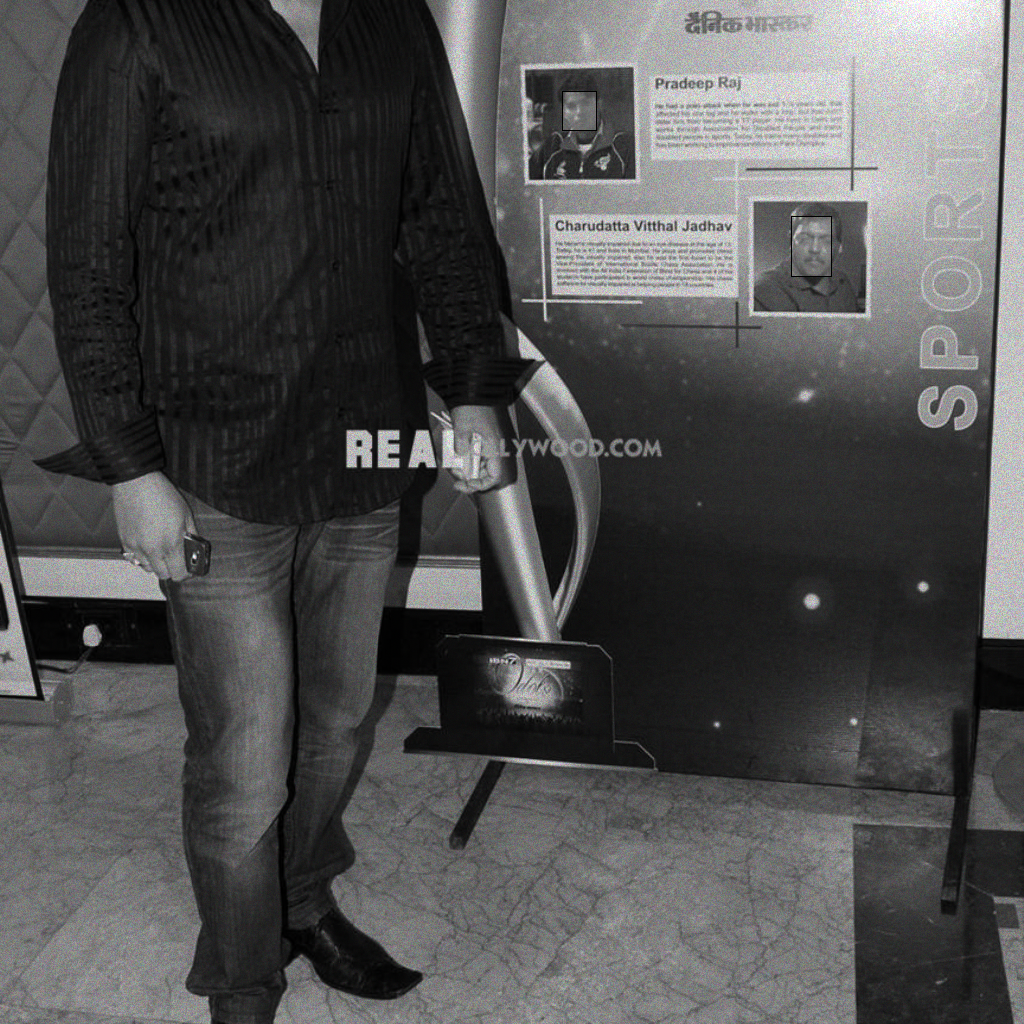

In [21]:
# choose an image
i = 0
# data = (np.transpose(I[i], [1, 2, 0])*255.0).astype('uint8')
data = (I[i]*255.0).astype('uint8')
image = Image.fromarray(data)
num_boxes = N[i]
boxes = B[i][:num_boxes]

draw_boxes(image, boxes)